In [29]:
from functions import (load_pickles, extract_joints, plot_joints_trajectory, 
                       get_step_metrics, get_asymmetry, process_biometrics_df)

In [30]:
#load all pickle files
model_outputs = load_pickles()

tracklets_dict = {}

for video_name, video_results in model_outputs.items():
    tracklets_dict[video_name] = extract_joints(video_results)

The structure of detections_dict we have after the above processing is as follows:

```python
    tracklets_dict = {
    
        #dict for each pickle
        'pickle_name' : {       
            #dict for each person
            'person_id' : {
                #dict for each joint
                'joint_name' : {
                    #dict for each dimension
                    'dimension':    List[numpy.float32]     #value for every detected frame
                }
            }
        }
    }
```

In [31]:
# gives the whole trajectory of RAnkle for a second person in demo_Athletic_Male
# tracklets_dict['demo_Athletic_Male'][1]['RAnkle'][0]

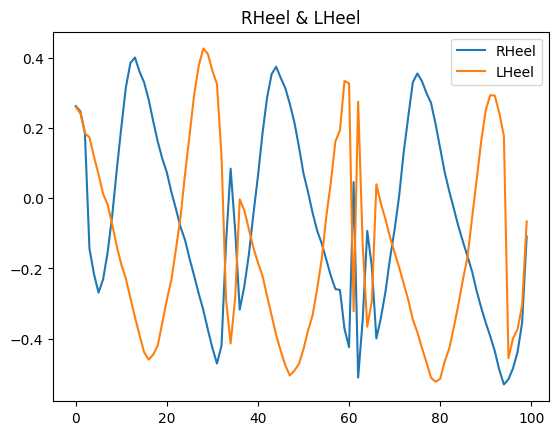

In [32]:
tracklet = tracklets_dict['demo_normal-gosia-side']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 0

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

## Step metrics

In [35]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_normal-gosia-side', person_id=0, 
                                                                        dim=0, joint='Heel', smoothing=True, _print=True)

Length of steps: 
[0.32892196 0.63651639 0.38933935 0.32301985 0.72145778]
Average step length: 0.47985106743872163
Speed: 0.02326217281879781
Time (timeframes): 89
Distance: 2.070333380873005


In [36]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', 
                                                                        person_id=1, dim=0, joint='Heel', smoothing=True, _print=True)

KeyError: 'demo_Athletic_Male'

For now the speed is in meters/timeframes. Needs converting into seconds. I think that every footage is processed in 30fps so this would mean dividing by 30 but we have to make sure.

Below the same footage from a front view. Well, it's shiet.

In [43]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', person_id=0, 
                                                                        dim=2, joint='Heel', smoothing=False)

Length of steps: 
[0.19652154 0.20736092 0.22899586 0.24945521 0.15296284 0.28207329
 0.27328473 0.27979557]
Average step length: 0.2338062459602952
Speed: 0.017080902293020367
Time (timeframes): 98
Distance: 1.6739284247159958
Assymetry: 0.017069740420224577


In [61]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_Athletic_Male', person_id=0, 
                                                                        dim=2, joint='Heel', smoothing=True)

Length of steps: 
[0.19698342 0.22378837 0.24595295 0.26839832 0.28944434 0.28249478
 0.27491244]
Average step length: 0.25456780195236206
Speed: 0.016340115354028354
Time (timeframes): 97
Distance: 1.5849911893407502


Why, you would ask?

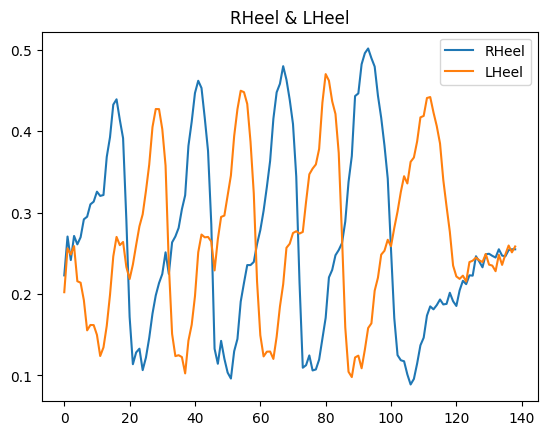

In [59]:
tracklet = tracklets_dict['demo_Athletic_Male']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 2

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

Side-view is the only reasonable angle we can use for step metrics.

Check for girl video as well below.

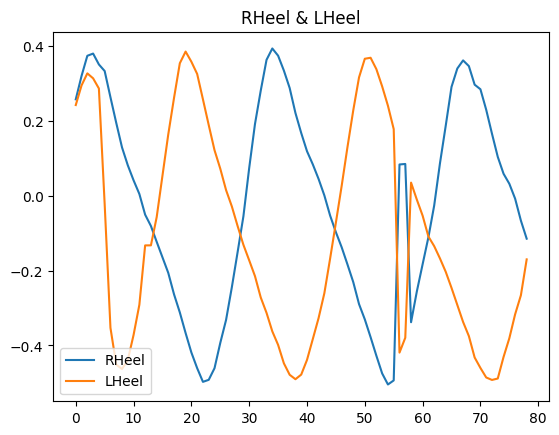

In [63]:
tracklet = tracklets_dict['demo_girl']
person_id = 0
joint_list = ['RHeel', 'LHeel']
dim = 0

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

In [62]:
steps_length, avg_step_length, speed, time, distance = get_step_metrics(tracklets_dict, 'demo_girl', person_id=0, 
                                                                        dim=0, joint='Heel', smoothing=False)

Length of steps: 
[0.64654259 0.7868343  0.7828882  0.76764268 0.74536392]
Average step length: 0.7458543390035629
Speed: 0.04893220795525445
Time (timeframes): 63
Distance: 3.0827291011810303


## Asymmetry

In [66]:
# sideview
asymmetry = get_asymmetry(tracklets_dict, 'demo_Athletic_Male', person_id=1, dim=2, joint='Hip', smoothing=False)

Assymetry: 0.7130486099432177


In [69]:
# frontview
asymmetry = get_asymmetry(tracklets_dict, 'demo_Athletic_Male', person_id=0, dim=0, joint='Hip', smoothing=False)

Assymetry: 0.033056958308696704


## Biometrics dataframe

In [125]:
df = process_biometrics_df(folder='pickles')
df.head()

(array([0.10181999, 0.06590254, 0.05981954, 0.03845623, 0.12744872,
       0.08199375, 0.03053366, 0.02418988, 0.02569125, 0.06187501,
       0.12560965, 0.11694358, 0.04110036, 0.03221841, 0.0415681 ,
       0.02496892]), 0.0625087252119556, 0.007018121963483281, 128, 0.89831961132586, -0.08633982530852258)
(array([0.10181999, 0.06590254, 0.05981954, 0.03845623, 0.12744872,
       0.08199375, 0.03053366, 0.02418988, 0.02569125, 0.06187501,
       0.12560965, 0.11694358, 0.04110036, 0.03221841, 0.0415681 ,
       0.02496892]), 0.0625087252119556, 0.007018121963483281, 128, 0.89831961132586, 0.6664227506717912)
(array([0.10181999, 0.06590254, 0.05981954, 0.03845623, 0.12744872,
       0.08199375, 0.03053366, 0.02418988, 0.02569125, 0.06187501,
       0.12560965, 0.11694358, 0.04110036, 0.03221841, 0.0415681 ,
       0.02496892]), 0.0625087252119556, 0.007018121963483281, 128, 0.89831961132586, 0.02024729671470049)
(array([0.10181999, 0.06590254, 0.05981954, 0.03845623, 0.12744872,
     

,walking_type,video_id,person_id,camera_type,steps_length,avg_step_length,speed,time,distance,asymmetry
0,normal,angry_girlfriend,0,front,"[0.43016132712364197, 0.4201328903436661, 0.15...",0.399542,0.040457,98,3.964805,"([0.10181999206542969, 0.06590253859758377, 0...."
1,normal,angry_girlfriend,0,side,"[0.7668778896331787, 0.7713070213794708, 0.830...",0.812373,0.069231,118,8.169222,"([0.10181999206542969, 0.06590253859758377, 0...."
2,normal,athletic_male,0,front,"[0.19368964433670044, 0.20325511693954468, 0.2...",0.234461,0.029988,103,3.088769,"([0.10181999206542969, 0.06590253859758377, 0...."
3,normal,athletic_male,0,side,"[0.5201098024845123, 0.7654724717140198, 0.750...",0.689091,0.088613,103,9.127168,"([0.10181999206542969, 0.06590253859758377, 0...."
4,normal,DTU1,0,back,"[0.06738704442977905, 0.043631091713905334, 0....",0.060041,0.008402,42,0.352900,"([0.10181999206542969, 0.06590253859758377, 0...."


In [118]:
df.to_csv("biometrics_data.csv", sep=";", index=False)

In [126]:
asymmetry

(array([0.10181999, 0.06590254, 0.05981954, 0.03845623, 0.12744872,
        0.08199375, 0.03053366, 0.02418988, 0.02569125, 0.06187501,
        0.12560965, 0.11694358, 0.04110036, 0.03221841, 0.0415681 ,
        0.02496892]),
 0.0625087252119556,
 0.007018121963483281,
 128,
 0.89831961132586,
 -0.004947438286820649)